In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
def htheta(theta, x):
    z = theta.transpose().dot(x)
    return 1/(1 + np.exp(-z))

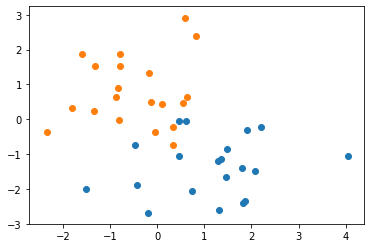

In [3]:
#Question 1 a) and b)
#Defining mean and variances of class0, class1
meanClass0X = 1
meanClass0Y = -1
meanClass1X = -1
meanClass1Y = 1

arr = np.ones(20).reshape(20,1)

varianceX = math.sqrt(1)
varianceY = math.sqrt(1)

#Generating and plotting class0
class0X = meanClass0X + varianceX*np.random.randn(20, 1)
class0Y = meanClass0Y + varianceY*np.random.randn(20, 1)
class0 = np.append(arr, class0X, axis=1)
class0 = np.append(class0, class0Y, axis=1)
plt.scatter(class0X, class0Y)

#Generating and plotting class1
class1X = meanClass1X + varianceX*np.random.randn(20, 1)
class1Y = meanClass1Y + varianceY*np.random.randn(20, 1)
class1 = np.append(arr, class1X, axis=1)
class1 = np.append(class1, class1Y, axis=1)
plt.scatter(class1X, class1Y)

plt.show()

In [15]:
print(class0[0])
print(class1[1])
print(theta)
theta = np.array([-0.309248025664515, -0.11986406306979995, -0.233211408262])

[ 1.         -1.51432899 -1.99994286]
[ 1.         -2.34727391 -0.36347411]
[-0.309248025664515, -0.11986406306979995, -0.233211408262]


In [20]:
l = -0.233211408262 + 0.01*(1 - htheta(theta, class1[0])*-0.36347411 + -0.0233211408262)
print(l)

-0.22182215579110168


[-0.3033061  -0.12873336 -0.24485007]


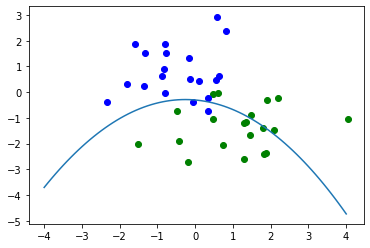

In [5]:
#Question 2
#Determining the random theta in (-0.5, 0.5)
theta1 = -0.5 + 0.5*random.random()
theta2 = -0.5 + 0.5*random.random()
theta3 = -0.5 + 0.5*random.random()
theta = np.array([theta1, theta2, theta3])
print(theta)
#plotting points class0=green, class1=blue
plt.scatter(class0X, class0Y, color="green")
plt.scatter(class1X, class1Y, color="blue")
#plotting theta
xvals = np.linspace(-4, 4, 80)
yvals = theta[0] + theta[1]*np.power(xvals, 1) + theta[2]*np.power(xvals, 2)
plt.plot(xvals,yvals)
plt.show()

#This is an initial, random guess for the function, and so will be innacurate

In [150]:
#Need to find log likelyhood error as well as a confusion matrix
#We have the htheta function in htheta(theta, x)
#Need to loop over all data points and sum the loglikelyhood error of each

llike = 0

for i in class0:
    #y always 0 in class 0, so onlike have to worry about 1-yi
    h = htheta(theta, i)
    llike = llike + np.log(1-h)   
for i in class1:
    #y always 1 in calss 1, so onlike have to worry about yi
    h = htheta(theta, i)
    llike = llike + np.log(h)
print(llike)

-21.931902203086022


In [151]:
def logLikelyhood(class0, class1, theta):
    llike = 0
    for i in class0:
        #y always 0 in class 0, so onlike have to worry about 1-yi
        h = htheta(theta, i)
        llike = llike + np.log(1-h)
    
    for i in class1:
        #y always 1 in calss 1, so onlike have to worry about yi
        h = htheta(theta, i)
        llike = llike + np.log(h)
    return llike

In [129]:
#Finding confusion matrix
for i in class0:
    dec = theta.transpose().dot(i)
    if dec < 0:
        print("0 | 0")
    else:
        print("1 | 0")
for i in class1:
    dec = theta.transpose().dot(i)
    if dec < 0:
        print("0 | 1")
    else:
        print("1 | 1")

0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
1 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
0 | 0
1 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
1 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
0 | 1
1 | 1
0 | 1
0 | 1


In [152]:
#Putting class0 and class1 together, class0 0:20, class1 21:40
featureSpace = np.append(class0, class1, axis=0)

In [235]:
#GD
alpha = 10e-5
lmbda = 1/40
lmbdaArr = np.array([0, lmbda, lmbda])
thetaOld = np.array([10, 10, 10])
thetaUse = theta
ep = 5e-8
i = 0
while i < 100000 and np.linalg.norm(thetaUse - thetaOld) > ep:
    thetaOld = thetaUse
    for count, val in enumerate(featureSpace):
        if count < 20:
            #class0
            thetaUse = thetaUse - alpha*((htheta(thetaUse, val))*val + lmbdaArr*thetaUse)
        else:
            #class1
            thetaUse = thetaUse - alpha*((1 - htheta(thetaUse, val))* + lmbdaArr*thetaUse)
        i += 1
print("Done")

Done


In [236]:
print(np.linalg.norm(thetaUse - thetaOld))
print(thetaUse)
print(thetaOld)
print(i)
print(logLikelyhood(featureSpace[0:20], featureSpace[21:], thetaUse))

0.000233338564173558
[-1.02116945 -0.80203219  0.58761815]
[-1.02094957 -0.8019913   0.58755163]
100000
-12.201113548199968


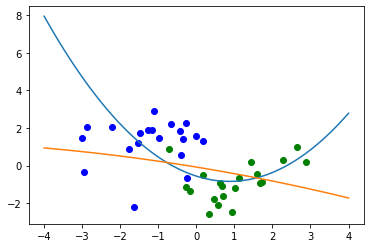

In [192]:
#plotting points class0=green, class1=blue
plt.scatter(class0X, class0Y, color="green")
plt.scatter(class1X, class1Y, color="blue")
#plotting theta
xvals = np.linspace(-4, 4, 80)
yvals = thetaUse[0] + thetaUse[1]*np.power(xvals, 1) + thetaUse[2]*np.power(xvals, 2)
plt.plot(xvals,yvals)
yvals2 = theta[0] + theta[1]*np.power(xvals, 1) + theta[2]*np.power(xvals, 2)
plt.plot(xvals,yvals2)
plt.show()

In [238]:
#Getting validation data

meanClass0X = 1
meanClass0Y = -1
meanClass1X = -1
meanClass1Y = 1

arr = np.ones(20).reshape(20,1)

varianceX = math.sqrt(1)
varianceY = math.sqrt(1)

#Generating and plotting class0
class0XValid = meanClass0X + varianceX*np.random.randn(20, 1)
class0YValid = meanClass0Y + varianceY*np.random.randn(20, 1)
class0Valid = np.append(arr, class0XValid, axis=1)
class0Valid = np.append(class0Valid, class0YValid, axis=1)

#Generating and plotting class1
class1XValid = meanClass1X + varianceX*np.random.randn(20, 1)
class1YValid = meanClass1Y + varianceY*np.random.randn(20, 1)
class1Valid = np.append(arr, class1XValid, axis=1)
class1Valid = np.append(class1Valid, class1YValid, axis=1)

In [239]:
#Getting testing data

meanClass0X = 1
meanClass0Y = -1
meanClass1X = -1
meanClass1Y = 1

arr = np.ones(20).reshape(20,1)

varianceX = math.sqrt(1)
varianceY = math.sqrt(1)

#Generating and plotting class0
class0XTest = meanClass0X + varianceX*np.random.randn(20, 1)
class0YTest = meanClass0Y + varianceY*np.random.randn(20, 1)
class0Test = np.append(arr, class0XTest, axis=1)
class0Test = np.append(class0Test, class0Y, axis=1)

#Generating and plotting class1
class1XTest = meanClass1X + varianceX*np.random.randn(20, 1)
class1YTest = meanClass1Y + varianceY*np.random.randn(20, 1)
class1Test = np.append(arr, class1XTest, axis=1)
class1Test = np.append(class1Test, class1YTest, axis=1)

In [201]:
print(thetaUse)
print(class0Valid[0])

[-0.56264068 -0.64569086  0.370767  ]
[ 1.         -0.17132416 -1.37126757]


In [240]:
#Error validation
corr0 = 0
corr1 = 0

for i in class0Valid:
    dec = thetaUse.transpose().dot(i)
    if dec < 0:
        corr0 += 1
for i in class1Valid:
    dec = thetaUse.transpose().dot(i)
    if dec > 0:
        corr1 += 1
print(corr0)
print(corr1)

print(logLikelyhood(class0Valid, class1Valid, thetaUse))

19
9
-17.456904896815356


In [241]:
#Error testing
corr0 = 0
corr1 = 0

for i in class0Test:
    dec = thetaUse.transpose().dot(i)
    if dec < 0:
        corr0 += 1
for i in class1Test:
    dec = thetaUse.transpose().dot(i)
    if dec > 0:
        corr1 += 1
print(corr0)
print(corr1)

print(logLikelyhood(class0Test, class1Test, thetaUse))

20
13
-13.1668118032642


In [204]:
#Error trained
corr0 = 0
corr1 = 0

for i in class0:
    dec = thetaUse.transpose().dot(i)
    if dec < 0:
        corr0 += 1
for i in class1:
    dec = thetaUse.transpose().dot(i)
    if dec > 0:
        corr1 += 1
print(corr0)
print(corr1)

19
16
